In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
import numpy as np

In [11]:
# xarray is a library for labeled multidimensional arrays which supports chunking
import xarray as xr

I have stored a spectrogram of 2 hours of signal from OOI which is 28GB, way bigger than the RAM on my laptop.

In [12]:
!ls -lh ../data/spectrogram.nc

-rw-r--r--  1 valentina  staff    28G Aug 30 16:36 ../data/spectrogram.nc


We will read this variable in a chunked format: note I specify the chunks.

In [13]:
%%time
spec = xr.open_dataarray('../data/spectrogram.nc', chunks = {'freq':2049,'time':7647})

CPU times: user 241 ms, sys: 76.6 ms, total: 318 ms
Wall time: 109 ms


In [14]:
spec

<xarray.DataArray (freq: 2049, time: 1835280)>
dask.array<shape=(2049, 1835280), dtype=float64, chunksize=(2049, 7647)>
Coordinates:
  * freq     (freq) float64 0.0 15.62 31.25 46.88 62.5 78.12 93.75 109.4 ...
  * time     (time) datetime64[ns] 2017-08-21T09:00:00.002000 ...

In [15]:
spec_window = spec.sel(time=slice('2017-08-21T10:50:40','2017-08-21T10:51'))

CPU times: user 4.07 s, sys: 3.44 s, total: 7.51 s
Wall time: 8.53 s


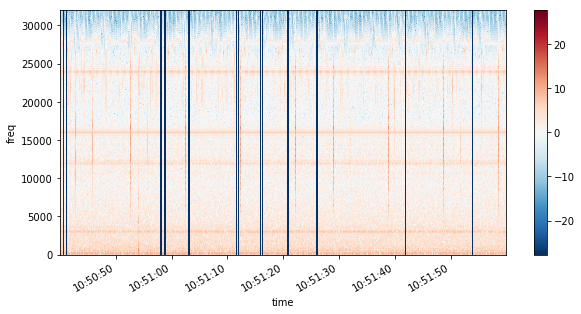

In [16]:
%%time
plt.figure(figsize = (10,5))
spec_window.plot()

CPU times: user 411 ms, sys: 174 ms, total: 585 ms
Wall time: 320 ms


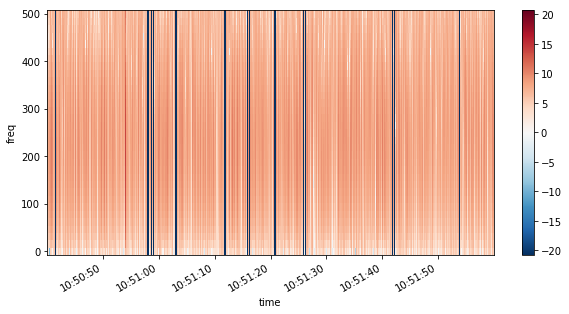

In [17]:
%%time
plt.figure(figsize = (10,5))
spec_window.sel(freq=slice(0,500)).plot()

In [18]:
%%time
spec = xr.open_mfdataset('../data/merged*.nc', chunks = {'freq':2049,'time':7647})

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/valentina/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-18-e7ece4a8bb0e>", line 1, in <module>
    get_ipython().run_cell_magic('time', '', "spec = xr.open_mfdataset('../data/merged*.nc', chunks = {'freq':2049,'time':7647})")
  File "/Users/valentina/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2115, in run_cell_magic
    result = fn(magic_arg_s, cell)
  File "<decorator-gen-59>", line 2, in time
  File "/Users/valentina/anaconda/lib/python3.6/site-packages/IPython/core/magic.py", line 188, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/Users/valentina/anaconda/lib/python3.6/site-packages/IPython/core/magics/execution.py", line 1185, in time
    exec(code, glob, local_ns)
  File "<timed exec>", line 1, in <module>
  File "/Users/valentina/anaconda/lib/python3.6/site-

OSError: [Errno 24] Too many open files

In [19]:
!ls ../data/merg*.nc|wc -l

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/valentina/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-b5660d26941e>", line 1, in <module>
    get_ipython().system('ls ../data/merg*.nc|wc -l')
  File "/Users/valentina/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2209, in system_piped
    self.user_ns['_exit_code'] = system(self.var_expand(cmd, depth=1))
  File "/Users/valentina/anaconda/lib/python3.6/site-packages/IPython/utils/_process_posix.py", line 157, in system
  File "/Users/valentina/anaconda/lib/python3.6/site-packages/pexpect/pty_spawn.py", line 197, in __init__
  File "/Users/valentina/anaconda/lib/python3.6/site-packages/pexpect/pty_spawn.py", line 297, in _spawn
  File "/Users/valentina/anaconda/lib/python3.6/site-packages/pexpect/pty_spawn.py", line 308, in _spawnpty
  File "/Users/valentina/anaconda/lib/python

OSError: [Errno 24] Too many open files

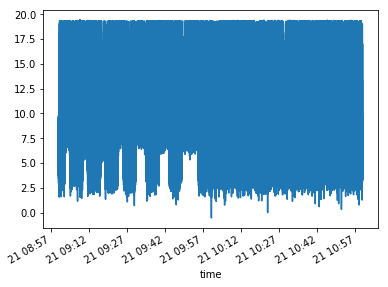

In [20]:
spec.sel(freq=slice(0,500)).mean(axis = 0).plot()